- 500 dataset에서 I vs E / S vs N / T vs F / J vs P 로 나누는 작업입니다. 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import typing
import copy

In [50]:
df = pd.read_csv('./MBTI 500.csv')
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [51]:
def dataset_split(data:pd.DataFrame, mode1:str, mode2:str) -> pd.DataFrame:
    data = copy.deepcopy(data)
    data.loc[data['type'].str.contains(mode1), 'type'] = mode1
    data.loc[data['type'].str.contains(mode2), 'type'] = mode2
    return data

In [52]:
df_E_I = dataset_split(df, 'E', 'I')
df_N_S = dataset_split(df, 'N', 'S')
df_T_F = dataset_split(df, 'T', 'F')
df_J_P = dataset_split(df, 'J', 'P')

In [53]:
print(np.unique(df_E_I['type']))
print(np.unique(df_N_S['type']))
print(np.unique(df_T_F['type']))
print(np.unique(df_J_P['type']))

['E' 'I']
['N' 'S']
['F' 'T']
['J' 'P']


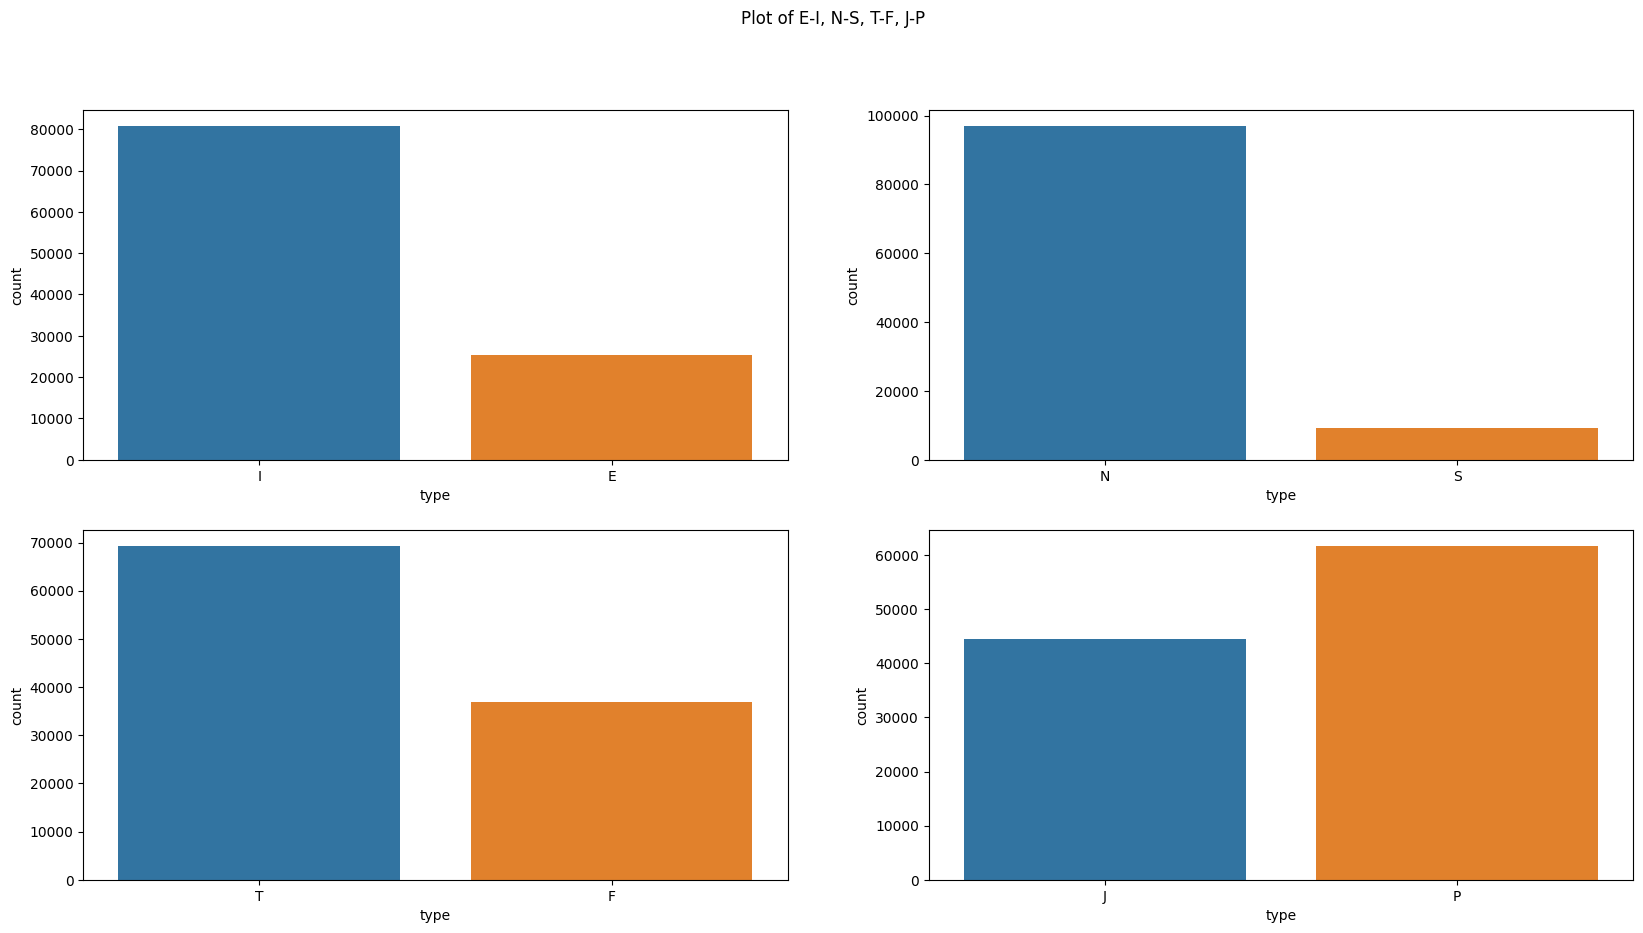

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x='type', data=df_E_I, ax=ax[0, 0], tick_label=['E', 'I'])
sns.countplot(x='type', data=df_N_S, ax=ax[0, 1], tick_label=['N', 'S'])
sns.countplot(x='type', data=df_T_F, ax=ax[1, 0], tick_label=['T', 'F'])
sns.countplot(x='type', data=df_J_P, ax=ax[1, 1], tick_label=['J', 'P'])
plt.suptitle('Plot of E-I, N-S, T-F, J-P')
plt.show()

In [61]:
type_counts_E_I = df_E_I['type'].value_counts()
type_counts_N_S = df_N_S['type'].value_counts()
type_counts_T_F = df_T_F['type'].value_counts()
type_counts_J_P = df_J_P['type'].value_counts()

print('E I 비율')
print(type_counts_E_I / type_counts_E_I.sum())
print('-'*20)
print('N S 비율')
print(type_counts_N_S / type_counts_N_S.sum())
print('-'*20)
print('T F 비율')
print(type_counts_T_F / type_counts_T_F.sum())
print('-'*20)
print('J P 비율')
print(type_counts_J_P / type_counts_J_P.sum())
print('-'*20)

E I 비율
type
I    0.760623
E    0.239377
Name: count, dtype: float64
--------------------
N S 비율
type
N    0.913253
S    0.086747
Name: count, dtype: float64
--------------------
T F 비율
type
T    0.652446
F    0.347554
Name: count, dtype: float64
--------------------
J P 비율
type
P    0.581067
J    0.418933
Name: count, dtype: float64
--------------------


In [62]:
df_E_I.to_csv('mbti_split_E_I.csv', index=False)
df_N_S.to_csv('mbti_split_N_S.csv', index=False)
df_T_F.to_csv('mbti_split_T_F.csv', index=False)
df_J_P.to_csv('mbti_split_J_P.csv', index=False)